## Содержание

* [Общая информация по проекту](#chapter_0)
* [1 Часть. Приоритизация гипотез](#chapter_1)
    * [Метод ICE](#chapter_1_1)
    * [Метод RICE](#chapter_1_2)
    * [Вывод](#chapter_1_3)
* [Часть 2. Анализ А/B теста](#chapter_2)
* [Куммулятивный график по выручке](#chapter_2_1)
* [График относительного изменения кумулятивного среднего чека группы B к группе A](#chapter_2_3)
* [График кумулятивного среднего количества заказов по группам](#chapter_2_4)
* [График относительного изменения кумулятивной конверсии группы B к группе A](#chapter_2_5)
* [Точечный график количества заказов по пользователям](#chapter_2_6)
* [95-й и 99-й перцентили количества заказов на пользователя](#chapter_2_7)
* [Точечный график стоимостей заказов](#chapter_2_8)
* [95-й и 99-й перцентили стоимостей заказов](#chapter_2_9)
* [Статистическая значимость различий в среднем количестве заказов между группами по «сырым» данным](#chapter_2_10)
* [Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным](chapter_2_11)
* [Cтатистическая значимость различий в среднем количестве заказов между группами по «очищенным» данным](#chapter_2_12)
* [Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным](#chapter_2_13)
* [Итоги А/В теста](#chapter_2_14)

## Общая информация по проекту <a class="anchor" id="anchor_0"></a>

В этом проекте я аналитик интернет-магазина и мне предстои проделать следующие действия:
- приоритизировать гипотезы из списка
- Провести A/B тесты
- Проанализировать и написать выводы по тестам

Основная цель: __понять нужно ли останавливать А/В тесты и на сколько показала себя тестируемая группа__

## Часть 1. Приоритизация гипотез <a class='anchor' id='chapter_1'></a>

В исходном файле содержится 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

### Метод ICE <a class='anchor' id='chapter_1_1'></a>

проанализируем гипотезы по методу ICE

In [36]:
# для начала импортируем все библиотеки которые могут нам понадобиться в процессе анализа

from scipy import stats as st
import numpy as np
import math as mth
import pandas as pd
import scipy.stats as stats
import datetime as dt

In [2]:
# откроем исходный файл

try:
    hypothesis = pd.read_csv('/Users/abc/Documents/Courses/yandex/projects/7/hypothesis.csv')
except:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
    
pd.options.display.max_colwidth = 100    

hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


<b>Содержание файла Hypothesis:</b>
    
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

In [3]:
# добавим столбец ICE

hypothesis['ICE'] = round(hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts'], 1)

hypothesis.sort_values(by='ICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3,8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3,7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0


### Метод RICE <a class='anchor' id='chapter_1_2'></a>

проанализируем гипотезы по методу RICE

In [4]:
# добавим столбец RICE

hypothesis['RICE'] = round(hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts'], 1)

hypothesis.sort_values(by='RICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3,7.0,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3,8.0,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0,3.0


## Выводы<a class='anchor' id='chapter_1_3'></a>

- при расчете по фреймворку ICE в лидерах оказалась гипотеза о том что акция на день рождения пользователя будет наиболее интересной для реализации в виду того что она точно окажет влияние на пользователя и ему будет приятно получить скидку в день рождения, а также она имеет среднюю трудоемкость для реализации со стороны команды разработки, но эта гипотеза имеет очень маленький охват. Это связано с тем что день рождения у пользователя только раз в год, а значит и увидит он эту акцию в случае 1/365 дней.
- при рассчете по фреймворку RICE наиболее приоритетной и интересной для проверки в А/В тесте оказалась гипотеза с созданием подписки на все основные страницы, что позволит собрать базу email клиетов и тут основным фактором поднявшим в спике гипотезу оказался охват(Reach), а также сопоставимая трудоемкось с первой гипотезой из фреймворка ICE
- Принимаем что необходимо провести А/В тесты для гипотезы в которой необходимо добавить форму подписки на все основные страницы для сбора базы клиентов

## Часть 2. Анализ А/B теста <a class='anchor' id='chapter_2'></a>

В этой части мы уже получили результаты теста и начинаем анализировать результаты А/B теста

In [5]:
# прочитаем исходные данные и посмотрим что в них содержится

try:
    orders = pd.read_csv('/Users/abc/Documents/Courses/yandex/projects/7/orders.csv')
except:
    orders = pd.read_csv('/datasets/orders.csv')
    
try:
    visitors = pd.read_csv('/Users/abc/Documents/Courses/yandex/projects/7/visitors.csv')
except:
    visitors = pd.read_csv('/datasets/visitors.csv')
    
    
display(orders.head(5))
display(visitors.head(5))
display(orders.info())
display(visitors.info())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

__summary исходных данных__

Файл с заказами orders:
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

Файл с информацией о посетителях:
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

In [6]:
# изменим тип данных у дат чтобы можно было дальше с ними работать

visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

display(orders.info())
display(visitors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


None

In [7]:
# дополнительно проверим данные на количество групп

display(orders['group'].value_counts())

display(visitors['group'].value_counts())

B    640
A    557
Name: group, dtype: int64

A    31
B    31
Name: group, dtype: int64

In [40]:
# определим даты начала и окончания теста

display(f'Самая ранняя дата заказа: {orders["date"].max()}, Самая поздняя дата заказа: {orders["date"].min()}')

display(f'Самая ранняя дата захода в приложение: {visitors["date"].min()}, Самая поздняя дата захода в приложение {visitors["date"].max()}')

'Самая ранняя дата заказа: 2019-08-31 00:00:00, Самая поздняя дата заказа: 2019-08-01 00:00:00'

'Самая ранняя дата захода в приложение: 2019-08-01 00:00:00, Самая поздняя дата захода в приложение 2019-08-31 00:00:00'

In [9]:
# проверим на дубликаты исходные данные

display(orders.duplicated().sum())
display(visitors.duplicated().sum())

0

0

## вывод:

- всего в исходных данных 2 группы А и В
- Дата начала теста 2019-08-01, а дата окончания теста 2019-08-31
- дубликаты в исходных данных отсутствуют

## Куммулятивный график по выручке<a class='anchor' id='chapter_2_1'></a>

построим куммулятивный график по выручке

In [42]:
# создадим уникальный массив пар групп и дат тестов

dates_group = orders[['date', 'group']].drop_duplicates().sort_values(by='date')

dates_group.head()

,date,group
55,2019-08-01,A
66,2019-08-01,B
175,2019-08-02,A
173,2019-08-02,B
291,2019-08-03,A


In [44]:
# соберем куммулятивные данные о заказах, для этого сгруппируем данные о заказах с накоплением по дням 

orders_aggregated = (dates_group.apply(lambda x: 
                                      orders[np.logical_and(orders['date'] <= x['date'],
                                                            orders['group'] == x['group'])]
                                .agg({'date':'max',
                                      'group':'max',
                                      'transactionId':'nunique',
                                      'visitorId':'nunique',
                                      'revenue':'sum'}),
                                      axis = 1)
                                .sort_values(by=['date', 'group'])
                    )

orders_aggregated.head(10)

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874
310,2019-08-03,B,61,59,380996
499,2019-08-04,A,84,77,425699
498,2019-08-04,B,78,75,489567
698,2019-08-05,A,109,100,549917
699,2019-08-05,B,101,98,581995


In [45]:
# посчитаем агрегированные данные по дням по посетителям

visitors_aggregated = (dates_group.apply(lambda x:
                                        visitors[np.logical_and(visitors['date'] <= x['date'],
                                                                visitors['group'] == x['group'])]
                                        .agg({'date':'max',
                                              'group':'max',
                                              'visitors':'sum'}),
                                        axis = 1)
                                  .sort_values(by=['date', 'group'])
                      )

visitors_aggregated.head(10)

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
310,2019-08-03,B,1803
499,2019-08-04,A,2562
498,2019-08-04,B,2573
698,2019-08-05,A,3318
699,2019-08-05,B,3280


In [47]:
# объединим полученных два массива черех метод merge

cumulative_data = orders_aggregated.merge(visitors_aggregated,
                                          how = 'left',
                                          left_on = ['date', 'group'],
                                          right_on = ['date', 'group'])

cumulative_data.head(10)

,date,group,transactionId,visitorId,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
5,2019-08-03,B,61,59,380996,1803
6,2019-08-04,A,84,77,425699,2562
7,2019-08-04,B,78,75,489567,2573
8,2019-08-05,A,109,100,549917,3318
9,2019-08-05,B,101,98,581995,3280


In [50]:
# переименуем столбцы в получившемся датафрейме

cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

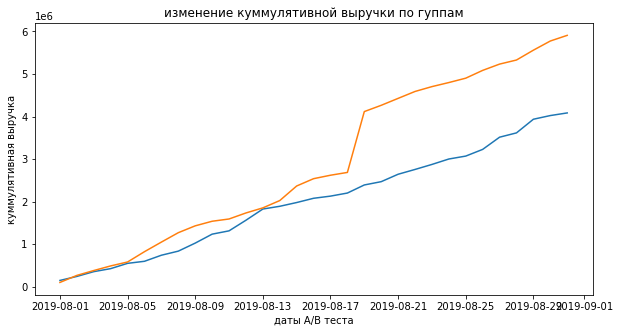

In [51]:
# построим графики кумулятивной выручки по каждой группе
# но предварительно разделим на два отдельных датафрема по группам

import matplotlib.pyplot as plt

cumulative_data_a = cumulative_data[cumulative_data['group'] == 'A'][['date', 'revenue', 'orders']]

cumulative_data_b = cumulative_data[cumulative_data['group'] == 'B'][['date', 'revenue', 'orders']]

plt.figure(figsize = (10, 5))
plt.plot(cumulative_data_a['date'], cumulative_data_a['revenue'], label = 'A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['revenue'], label = 'B')
plt.xlabel('даты А/В теста')
plt.ylabel('куммулятивная выручка')
plt.title('График изменения куммулятивной выручки по гуппам')
plt.show()

## вывод:

- В группе В с 18 числа сильно выросла средняя выручка, возможно в этот момент был всплеск числа заказов или в эту дату были совершены большие покупки
- В группе А выручка растет равномерно и всплесков не наблюдается на протяжении всего периода

### Куммулятивный график среднего чека по группам<a class='anchor' id='chapter_2_2'></a>

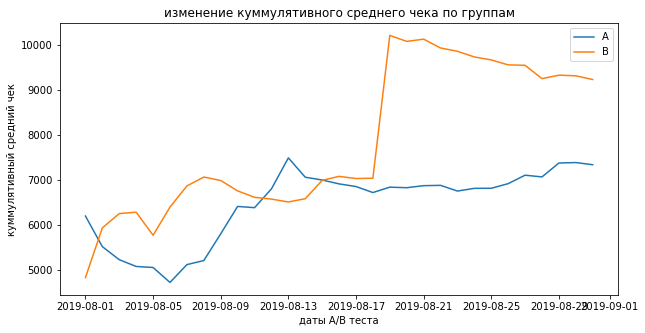

In [52]:
# для расчета среднего чека воспользуемся данными из предыдущего пункта
# добавим в датафреймы столбцы со значениями среднего чека

plt.figure(figsize = (10, 5))
plt.plot(cumulative_data_a['date'], cumulative_data_a['revenue'] / cumulative_data_a['orders'], label = 'A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['revenue'] / cumulative_data_b['orders'], label = 'B')
plt.legend()
plt.xlabel('даты А/В теста')
plt.ylabel('куммулятивный средний чек')
plt.title('График изменения куммулятивного среднего чека по группам')
plt.show()

## вывод:

- В группе В с 18 числа также видно что вырос средний чек с 18 числа, видимо в это время были совершены крупные покупки
- В группе А средний чек сначала рос потом падал и после 13 числа начал стабилизироваться, возможно это из-за того что сначала были крупные покупки , потом покупки были на небольшую сумму, а затем снова начал разсти размер чека за счет размера покупки

## График относительного изменения кумулятивного среднего чека группы B к группе A<a class='anchor' id='chapter_2_3'></a>

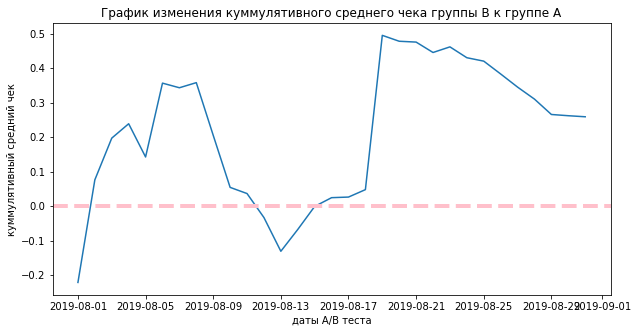

In [54]:
# построим график относительного измененеия кумулятивного среднего чека группы В к группе А

# для этого объединим ранее полуенные данные по двум группам в один датафрейм

merged_сumulative_revenue = cumulative_data_a.merge(cumulative_data_b,
                                                    how = 'left',
                                                    on = 'date',
                                                    suffixes = ['A', 'B'])

plt.figure(figsize = (10, 5))
plt.plot(merged_сumulative_revenue['date'],
         ((merged_сumulative_revenue['revenueB'] / merged_сumulative_revenue['ordersB']) /
          (merged_сumulative_revenue['revenueA'] / merged_сumulative_revenue['ordersA']))-1,
         label = 'B/A')
plt.axhline(y = 0,
            linestyle = '--',
            linewidth = 4,
            color = 'pink')
plt.xlabel('даты А/В теста')
plt.ylabel('куммулятивный средний чек')
plt.title('График изменения куммулятивного среднего чека группы В к группе А')
plt.show()

## вывод:

- сначала средний чек группы B вырос относительно группы А, после чего было падение до уровня группы А и после 
резо снова средний чек вырос
- Возможно в этих точках роста были крупные заказы

## График кумулятивной конверсии по группам<a class='anchor' id='chapter_2_4'></a>

In [55]:
# для этого сначала рассчитаем конверсию по группам

cumulative_data['conversion'] = cumulative_data['buyers'] / cumulative_data['visitors']

# теперь разделим этот датафрейм на два по группам

cumulative_data_a = cumulative_data[cumulative_data['group'] == 'A']
cumulative_data_b = cumulative_data[cumulative_data['group'] == 'B']

cumulative_data_a.head()

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,148579,719,0.027816
2,2019-08-02,A,44,38,242401,1338,0.028401
4,2019-08-03,A,68,62,354874,1845,0.033604
6,2019-08-04,A,84,77,425699,2562,0.030055
8,2019-08-05,A,109,100,549917,3318,0.030139


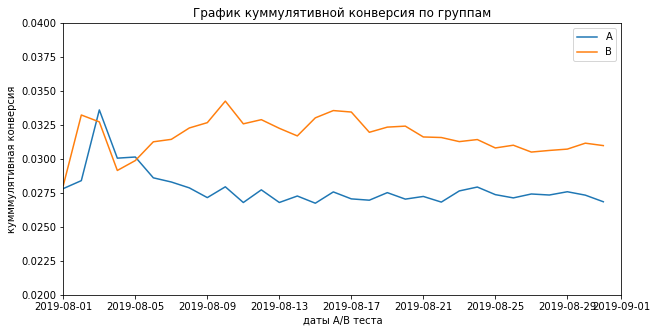

In [57]:
# построим график по группам

plt.figure(figsize = (10, 5))
plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label = 'A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label = 'B')
plt.legend()
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0.02, 0.04])
plt.xlabel('даты А/В теста')
plt.ylabel('кумммулятивная конверсия')
plt.title('График куммулятивной конверсия по группам')
plt.show()

## вывод:

- видно что сначала кумулятивные конверсии были близки, но потом у группы В она стала стабильно выше
- стабилизация результатов в обеих группах наступила

## График относительного изменения кумулятивной конверсии группы B к группе A<a class='anchor' id='chapter_2_5'></a>

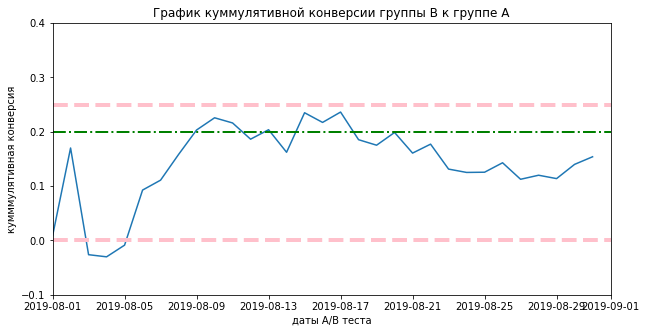

In [59]:
# построим график относительного изменения предварительно объединив ранеее полученные по группам массивы

merged_сumulative_conversion = (cumulative_data_a[['date', 'conversion']]
                                .merge(cumulative_data_b[['date', 'conversion']],
                                       how = 'left',
                                       on = 'date',
                                       suffixes = ['A', 'B'])
                               )

plt.figure(figsize = (10, 5))
plt.plot(merged_сumulative_revenue['date'],
         (merged_сumulative_conversion['conversionB'] / merged_сumulative_conversion['conversionA'])-1,
         label = 'B/A')

plt.axhline(y = 0, linestyle = '--', linewidth = 4, color = 'pink')
plt.axhline(y = 0.25, linestyle = '--', linewidth = 4, color = 'pink')
plt.axhline(y = 0.2, linestyle = '-.', linewidth = 2, color = 'green')

plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), -0.1, 0.4])
plt.xlabel('даты А/В теста')
plt.ylabel('кумммулятивная конверсия')
plt.title('График куммулятивной конверсии группы В к группе А')
plt.show()

## вывод:

- на третий день куммулятивная конверсия группы А выросла относительно группы В, а дальше стабильно выше была конверсия группы В (выше на 20%  в среднем)
- под конец исследуемого срока наблюдается небольшой нисходящий тренд
- однозначно сказать причины по которым произошел этот рост пока нельзя, необходим дальнейший анализ

## Точечный график количества заказов по пользователям <a class='anchor' id='chapter_2_6'></a>

In [60]:
# построим точечный график для определения наличия аномальных значений

# сгенерируем объект  датафрейм с количеством заказов по каждому покупателю

orders_buyers = (orders
                 .groupby('visitorId', as_index = False)
                 .agg({'transactionId':'nunique'})
                )
    
orders_buyers.columns = ['user_id', 'orders']
orders_buyers.sort_values(by = 'orders', ascending = False).head()

,user_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5


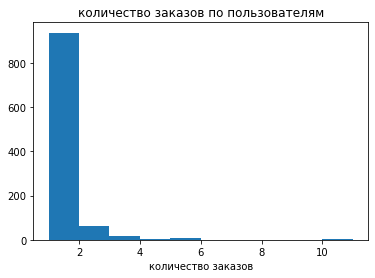

In [61]:
# посмотрим гистрограмму 

plt.hist(orders_buyers['orders'])
plt.xlabel('количество заказов')
plt.title('График количества заказов по пользователям')
plt.show()

Видно что в основном пользователи делали 1 или 2 заказа,  но также есть выбросы на уровне 6 и 10 заказов

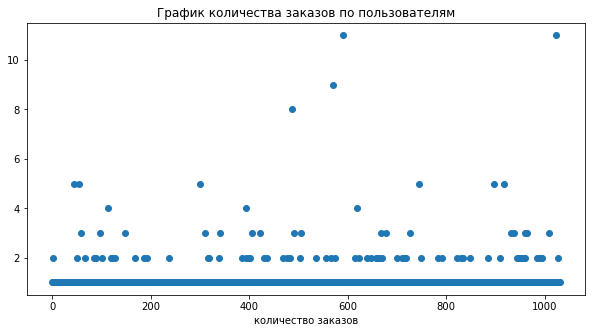

In [63]:
# построим точечный гарфик

x_values = pd.Series(range(0, len(orders_buyers)))

plt.figure(figsize = (10, 5))
plt.scatter(x_values, orders_buyers['orders'])

plt.xlabel('количество заказов')
plt.title('График количества заказов по пользователям')
plt.show()

## вывод:

- Основная масса пользователей заказывает от 1 до 3 заказов, возможно остальные можно считать выбросами
- Аномально маленьких занчений здесь не может быть потому что 1 заказ и так является минимально доступным вариантом

## 95-й и 99-й перцентили количества заказов на пользователя <a class='anchor' id='chapter_2_7'></a>

In [64]:
# определим границу аномального количестве заказов на пользователя

np.percentile(orders_buyers['orders'], [90, 95, 99])

array([1., 2., 4.])

## вывод:

- Принимаем границу аномального количества заказов на уровне 4 заказов, а все что больше попадает в 1% заказов

## Точечный график стоимостей заказов <a class='anchor' id='chapter_2_8'></a>

425     1294500
1196     202740
858       93940
1136      92550
744       86620
Name: revenue, dtype: int64

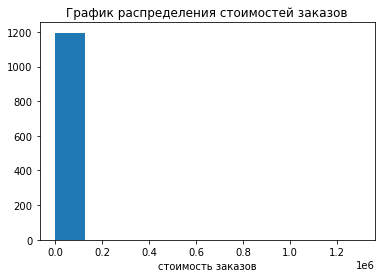

In [67]:
# построим гистрограмму распределение стоимостей заказов

display(orders['revenue'].sort_values(ascending = False).head())

plt.hist(orders['revenue'])
plt.xlabel('стоимость заказов')
plt.title('График распределения стоимостей заказов')
plt.show()

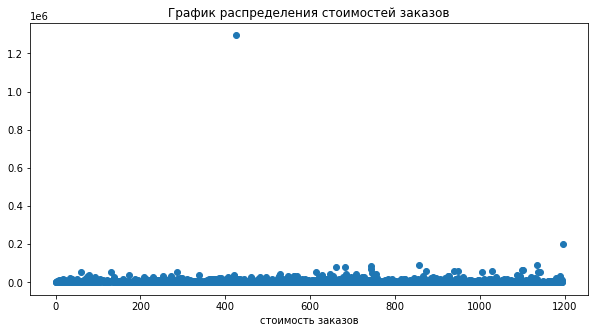

In [70]:
# построим точечную диаграмму

x_value = pd.Series(range(0, len(orders)))

plt.figure(figsize = (10, 5))
plt.scatter(x_value, orders['revenue'])
plt.xlabel('стоимость заказов')
plt.title('График распределения стоимостей заказов')
plt.show()

## вывод:

- Есть два выброса согласно точечной диаграмме, осталось определить границу стоимости

## 95-й и 99-й перцентили стоимостей заказов <a class='anchor' id='chapter_2_9'></a>

In [71]:
# куда деваться считаем перцентили

np.percentile(orders['revenue'], [90, 95, 99])

array([18168. , 28000. , 58233.2])

## вывод:

- Границу стоимости определяем в районе 58300, все заказы что выше будут считаться аномально большими
- аномально маленькие заказы нам не интересны, потому что мы ищем причины всплесков вверх (роста)

## Статистическая значимость различий в среднем количестве заказов между группами по «сырым» данным <a class='anchor' id='chapter_2_10'></a>

- Посчитаем статистическую значимость различий в среднем числе заказов на пользователя между группами по «сырым» данным — без удаления аномальных пользователей.
- Сформулируем гипотезы. Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем количестве заказов между группами есть.
- Зададим уровень статистической значимости p_value = 0.05
- В анализе будем использовать метод Манна-Уитни

In [29]:
# подготовим исходные данные

# соберем по группам количество посетителей по датам

visitors_daily_a = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_daily_a.columns = ['date', 'visitors_per_date_a']

visitors_daily_b = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_daily_b.columns = ['date', 'visitors_per_date_b']

# соберем по группам накопительным итогом количество посетителей по датам

visitors_cummulative_a = visitors_daily_a.apply(
    lambda x: visitors_daily_a[visitors_daily_a['date'] <= x['date']].agg(
    {'date':'max', 'visitors_per_date_a':'sum'}), axis = 1
    )

visitors_cummulative_a.columns = ['date', 'visitors_cummulative_a']

visitors_cummulative_b = visitors_daily_b.apply(
    lambda x: visitors_daily_b[visitors_daily_b['date'] <= x['date']].agg(
    {'date':'max', 'visitors_per_date_b':'sum'}), axis = 1
    )

visitors_cummulative_b.columns = ['date', 'visitors_cummulative_b']

# соберем количество заказов и выручку накопительным итогом по группам

orders_daily_a = (
                    orders[orders['group'] == 'A'][['date', 'transactionId', 'revenue']]\
                        .groupby('date', as_index = False)\
                        .agg({'date':'max', 'transactionId':'nunique', 'revenue':'sum'})
)

orders_daily_a.columns = ['date', 'orders_per_date_a', 'revenue_per_date_a']

orders_cummulative_a = orders_daily_a.apply(
    lambda x: orders_daily_a[orders_daily_a['date'] <= x['date']].agg(
    {'date':'max', 'orders_per_date_a':'sum', 'revenue_per_date_a':'sum'}), axis = 1).sort_values(by = ['date'])

orders_cummulative_a.columns = ['date', 'orders_cummulative_a', 'revenue_cummulative_a']

orders_daily_b = (
                    orders[orders['group'] == 'B'][['date', 'transactionId', 'revenue']]\
                        .groupby('date', as_index = False)\
                        .agg({'date':'max', 'transactionId':'nunique', 'revenue':'sum'})
)

orders_daily_b.columns = ['date', 'orders_per_date_b', 'revenue_per_date_b']

orders_cummulative_b = orders_daily_b.apply(
    lambda x: orders_daily_b[orders_daily_b['date'] <= x['date']].agg(
    {'date':'max', 'orders_per_date_b':'sum', 'revenue_per_date_b':'sum'}), axis = 1).sort_values(by = ['date'])

orders_cummulative_b.columns = ['date', 'orders_cummulative_b', 'revenue_cummulative_b']

# соберем в один датафрейм все что получили выше

data = visitors_daily_a.merge(visitors_daily_b, how = 'left', on = 'date')\
                       .merge(visitors_cummulative_a, how = 'left', on = 'date')\
                       .merge(visitors_cummulative_b, how = 'left', on = 'date')\
                       .merge(orders_daily_a, how = 'left', on = 'date')\
                       .merge(orders_daily_b, how = 'left', on = 'date')\
                       .merge(orders_cummulative_a, how = 'left', on = 'date')\
                       .merge(orders_cummulative_b, how = 'left', on = 'date')

display(data.head())

,date,visitors_per_date_a,visitors_per_date_b,visitors_cummulative_a,visitors_cummulative_b,orders_per_date_a,revenue_per_date_a,orders_per_date_b,revenue_per_date_b,orders_cummulative_a,revenue_cummulative_a,orders_cummulative_b,revenue_cummulative_b
0,2019-08-01,719,713,719,713,24,148579,21,101217,24,148579,21,101217
1,2019-08-02,619,581,1338,1294,20,93822,24,165531,44,242401,45,266748
2,2019-08-03,507,509,1845,1803,24,112473,16,114248,68,354874,61,380996
3,2019-08-04,717,770,2562,2573,16,70825,17,108571,84,425699,78,489567
4,2019-08-05,756,707,3318,3280,25,124218,23,92428,109,549917,101,581995


In [30]:
# создадим переменные по группам в которых сгруппируем по столбцам идентификаторы пользователей,
# которые совершали хотябы одну покупку, и количество заказов

orders_by_users_a = orders[orders['group'] == 'A']\
                        .groupby('visitorId', as_index = False)\
                        .agg({'transactionId':'nunique'})

orders_by_users_a.columns = ['visitors', 'orders']

orders_by_users_b = orders[orders['group'] == 'B']\
                        .groupby('visitorId', as_index = False)\
                        .agg({'transactionId':'nunique'})

orders_by_users_b.columns = ['visitors', 'orders']

display(orders_by_users_a.sort_values(by='orders', ascending = False).head())

display(orders_by_users_b.sort_values(by='orders', ascending = False).head())

,visitors,orders
499,4256040402,7
227,2038680547,5
278,2458001652,5
269,2378935119,4
18,199603092,4


,visitors,orders
340,2458001652,6
326,2378935119,5
501,3717692402,4
514,3803269165,4
580,4256040402,4


In [31]:
# Объявим переменные sample_a и sample_b, в которых пользователям из разных групп 
# будет соответствовать количество заказов. 
# Тем, кто ничего не заказал, будут соответствовать нули.
# Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

sample_a = pd.concat([orders_by_users_a['orders'], pd.Series(
    0, index = np.arange(data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])), name = 'orders')], axis=0)

sample_b = pd.concat([orders_by_users_b['orders'], pd.Series(
    0, index = np.arange(data['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])), name = 'orders')], axis=0)

In [32]:
# проверим критерием Манна-Уитни

print('P_value:', "{0:.5f}".format(stats.mannwhitneyu(sample_a, sample_b)[1]))

print('Отношение среднего количества заказов группы В к гпуппе А по сырым данным:',"{0:.5f}".format(sample_b.mean() / sample_a.mean() - 1))

P_value: 0.01679
Отношение среднего количества заказов группы В к гпуппе А по сырым данным: 0.13808


## вывод:

- По "сырым данным" уровень значимости не привысил значение в 0,05 а значит мы отвергаем нулевую гепотезу
о том что различий по среднему количеству заказов в группах нет и они вероятно они есть
- В группе В на 13,8 % больше в среднем заказов приходится на одного пользователя
- Нужно будет проверить эту гипотезу на "очищенных данных"

## Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным <a class='anchor' id='chapter_2_11'></a>

- Посчитаем статистическую значимость различий в среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей.
- Сформулируем гипотезы. Нулевая: различий в среднем чеке между группами нет. Альтернативная: различия в среднем чеке между группами есть.

In [33]:
print('P_value:','{:.5f}'.format(st.mannwhitneyu(orders[orders['group'] == 'B']['revenue'], 
                                       orders[orders['group'] == 'A']['revenue'])[1]))

print('Отношение среднего чека в группе В к группе А по сырым данным:','{:.5f}'.format(orders[orders['group'] == 'B']['revenue'].mean() / 
                        orders[orders['group'] == 'A']['revenue'].mean() - 1))

P_value: 0.72929
Отношение среднего чека в группе В к группе А по сырым данным: 0.25871


## вывод:

- По "сырым данным" уровень значимости привысил значение в 0,05 а значит мы не отвергаем нулевую гепотезу
о том что различий по среднему чеку в группах нет
- Но при этом в группе В на 26% средний чек выше чем в группе А
- Нужно будет проверить эту гипотезу на "очищенных данных"

## Cтатистическая значимость различий в среднем количестве заказов между группами по «очищенным» данным<a class='anchor' id='chapter_2_12'></a>

- ранее мы посчитали что аномальным количеством заказов на пользователя было 5 и более заказов и размер заказа считается аномальным если превышает 58300
- очистим данные

In [34]:
# очистим данные по количеству заказов

users_with_many_orders = pd.concat(
    [
     orders_by_users_a[orders_by_users_a['orders'] >= 4]['visitors'],
     orders_by_users_b[orders_by_users_b['orders'] >= 4]['visitors']
    ]
)

# очистим данные по размеру заказов

orders_with_big_revenue = orders[orders['revenue'] > 58300]['visitorId']

#соберем воедино аномальных пользователей

anormal_users = pd.concat([users_with_many_orders, orders_with_big_revenue], axis = 0)\
                  .drop_duplicates()\
                  .sort_values()

display(anormal_users)

# посчитаем статистическую значимость

sample_filtered_a = pd.concat(
                                [
                                    orders_by_users_a[
                                        np.logical_not(orders_by_users_a['visitors']
                                                       .isin(anormal_users))]['orders'],
                                                            pd.Series(0, index = np.arange(
                                                                data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])),
                                                                      name = 'orders',
                                                                     ),
                                ]
                                ,axis=0
)

sample_filtered_b =  pd.concat(
                                [
                                    orders_by_users_b[
                                        np.logical_not(orders_by_users_b['visitors']
                                                       .isin(anormal_users))]['orders'],
                                                            pd.Series(0, index = np.arange(
                                                                data['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])),
                                                                      name = 'orders',
                                                                     ),
                                ]
                                ,axis=0
)
# проверим критерием Манна-Уитни

print('P_value:',"{0:.5f}".format(stats.mannwhitneyu(sample_filtered_a, sample_filtered_b)[1]))

print('Отношение среднего количества заказов группы В к гпуппе А по очищенным данным:',"{0:.5f}".format(sample_filtered_b.mean() / sample_filtered_a.mean() - 1))

1099     148427295
18       199603092
23       237748145
949      887908475
744      888512513
1103    1164614297
1136    1307669133
858     1316129916
425     1920142716
227     2038680547
1196    2108080724
269     2378935119
278     2458001652
424     3062433592
501     3717692402
514     3803269165
940     4003628586
743     4133034833
499     4256040402
662     4266935830
dtype: int64

P_value: 0.01390
Отношение среднего количества заказов группы В к гпуппе А по очищенным данным: 0.15103


## вывод:

- По "очищенным данным" уровень значимости не привысил значение в 0,05 а значит мы все также
отвергаем нулевую гепотезу о том что различий по среднему количеству заказов в группах нет
- В группе В на 15,1% больше в среднем заказов приходится на одного пользователя

## Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным<a class='anchor' id='chapter_2_13'></a>

In [35]:
print('P_value:','{:.5f}'.format(
    st.mannwhitneyu(
        orders[np.logical_and(
            np.logical_not(
                orders['visitorId'].isin(anormal_users)),
                    orders['group'] == 'B')]['revenue'], 
                                       orders[np.logical_and(
            np.logical_not(
                orders['visitorId'].isin(anormal_users)),
                    orders['group'] == 'A')]['revenue'])
                            [1]
                        )
        )

print('Отношение среднего чека в группе В к группе А по очищенным данным:','{:.5f}'.format(orders[np.logical_and(
            np.logical_not(
                orders['visitorId'].isin(anormal_users)),
                    orders['group'] == 'B')]['revenue'].mean() / 
                        orders[np.logical_and(
            np.logical_not(
                orders['visitorId'].isin(anormal_users)),
                    orders['group'] == 'A')]['revenue'].mean() - 1))

P_value: 0.95885
Отношение среднего чека в группе В к группе А по очищенным данным: -0.01385


## вывод:

- По "очищенным данным" уровень значимости привысил значение в 0,05 а значит мы все также не отвергаем нулевую гепотезу о том что различий по среднему чеку в группах нет
- Но при этом в группе В на 1% средний чек ниже чем в группе А
- в группе В были неочищенные данные(заказы с высоким чеком) которые сильно завышали средний чек по сравнению с группой А

## Итоги А/В теста<a class='anchor' id='chapter_2_14'></a>

- Куммулятивные графики конверсии и среднего чека у группы В были выше чем у группы А  и имели восходящие тендеции
- Среднее количество заказов на пользователя статичтически значимо отличалось в большую сторону у группы В, по "очищенным данным" на 15,1%
- А вот разница средних чеков для двух групп оказалась в большой долей вероятности оказалась одинаковой и составила разницу в 1% по "очищенным данным"
- Показатели тестовой группы В положительные и вероятнее всего на этот успех повлияло большее количество заказов на пользователя, что наводит на мысль о том что клиенты стали охотнее возвращаться за покупками
- Тест необходимо признать положительным и остановить. Возможно его стоит продолжить для определения более четкого тренда по куммулятивной конверсии по группам